In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from featurewiz import featurewiz
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import RobustScaler

Imported 0.2.02 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [86]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [58]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [59]:
data=data.drop("id",axis=1)

In [60]:
data=data.dropna()
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [48]:
def box(data):
    df=data.drop(['gender', 'hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke'],axis=1)
    nonbinary_columns = [column for column in df.columns if len(df[column].unique()) > 2]

    plt.figure(figsize=(20, 20))

    for i, column in enumerate(nonbinary_columns):
        plt.subplot(3, 6, i + 1)
        sns.boxplot(data=data[column],color='#157dd9')
        plt.title(column)

    plt.suptitle("Boxplots With Outliers", size=30)

    plt.show()

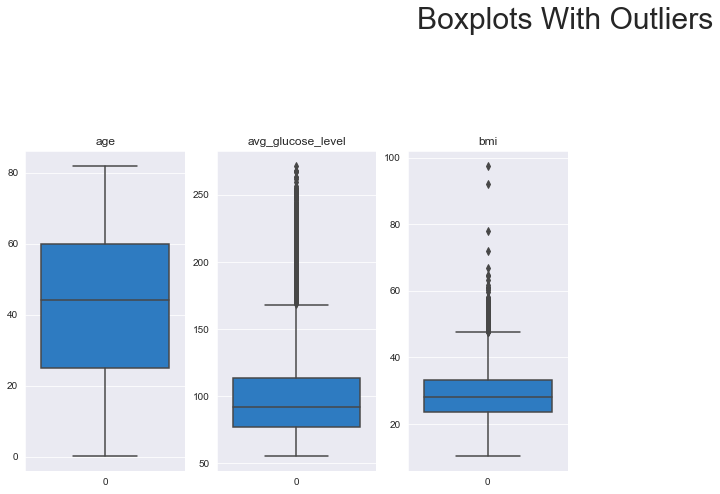

In [24]:
box(data)

In [61]:
def outliersCapping(c):
    upper_limit = data[c].mean() + 3 * data[c].std()
    lower_limit = data[c].mean() - 3 * data[c].std()

    data[c] = np.where(
        data[c] > upper_limit,
        upper_limit,
        np.where(data[c] < lower_limit, lower_limit, data[c]),
    )

In [62]:
outliersCapping('avg_glucose_level')

In [63]:
outliersCapping('bmi')

In [85]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [81]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [89]:
for col in data.columns:
   if data[col].dtype=='object':
       l_en=LabelEncoder()
       data[col] = l_en.fit_transform(data[col])

In [91]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [83]:
target = "stroke"

features, train = featurewiz(
    data,
    target,
    corr_limit=0.8,
    verbose=0,
    sep=",",
    header=0,
    test_data="",
    feature_engg="interactions",
    category_encoders="",
)


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.8
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (5110, 12)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        1 variable(s) to be removed since ID or low-information variables
    	variab

KeyboardInterrupt: 

In [39]:
x = train.drop(["stroke"], axis=1)
y = train["stroke"].values
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

XGBClassifier
0.9994907053730583
0.9541751527494908
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.95      0.93       982

0:	learn: 0.2817446	total: 46ms	remaining: 414ms
1:	learn: 0.1702154	total: 90.1ms	remaining: 360ms
2:	learn: 0.1381794	total: 129ms	remaining: 302ms
3:	learn: 0.1272094	total: 169ms	remaining: 254ms
4:	learn: 0.1169775	total: 210ms	remaining: 210ms
5:	learn: 0.1051619	total: 249ms	remaining: 166ms
6:	learn: 0.0973311	total: 289ms	remaining: 124ms
7:	learn: 0.0889141	total: 330ms	remaining: 82.4ms
8:	learn: 0.0813859	total: 369ms	remaining: 41ms
9:	learn: 0.0762076	total: 409ms	remaining: 0us
CatBoostClassifier
0.972498090145149
0.955193482688391
              precision    recall  f1-score   support

           0 

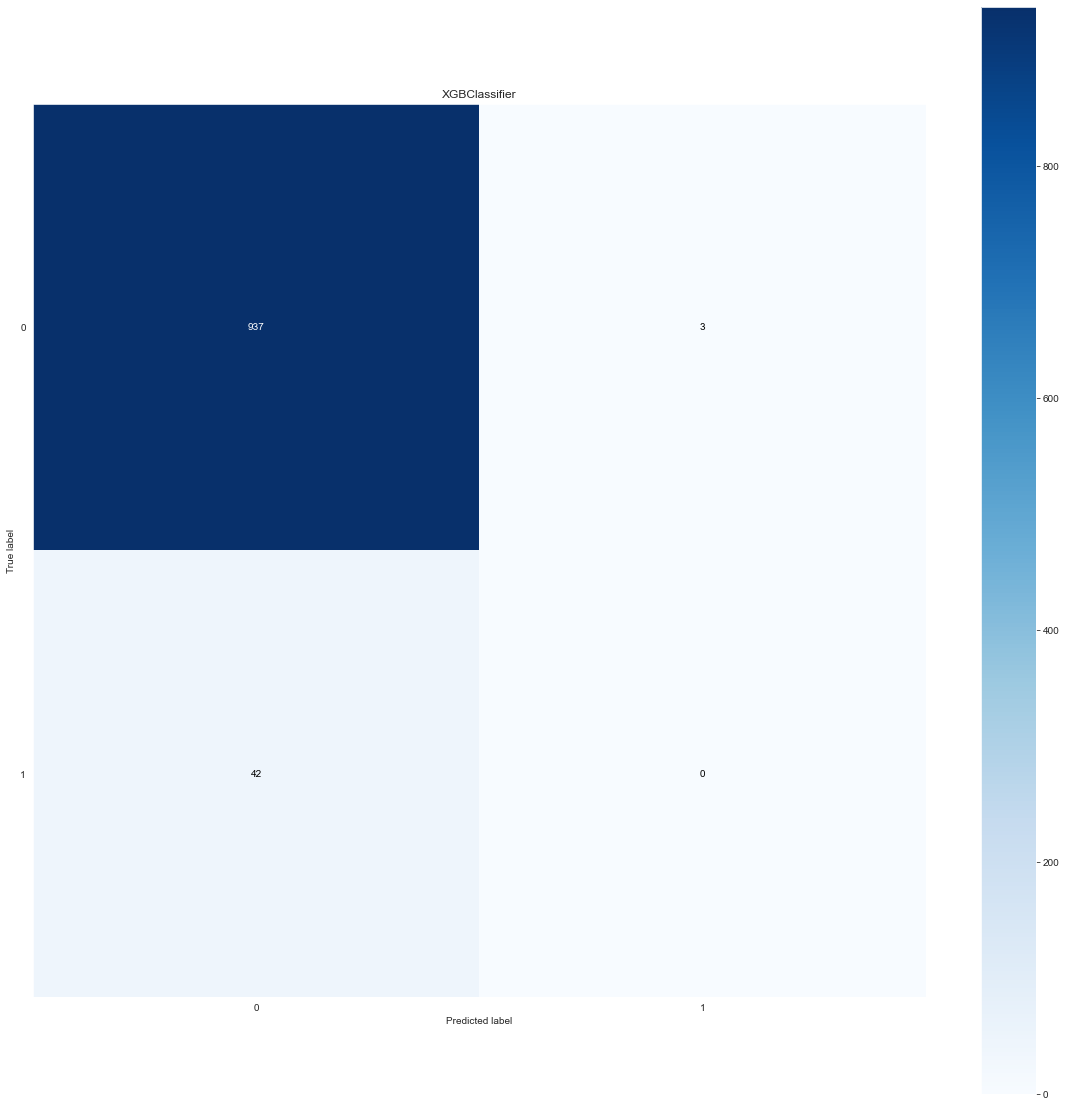

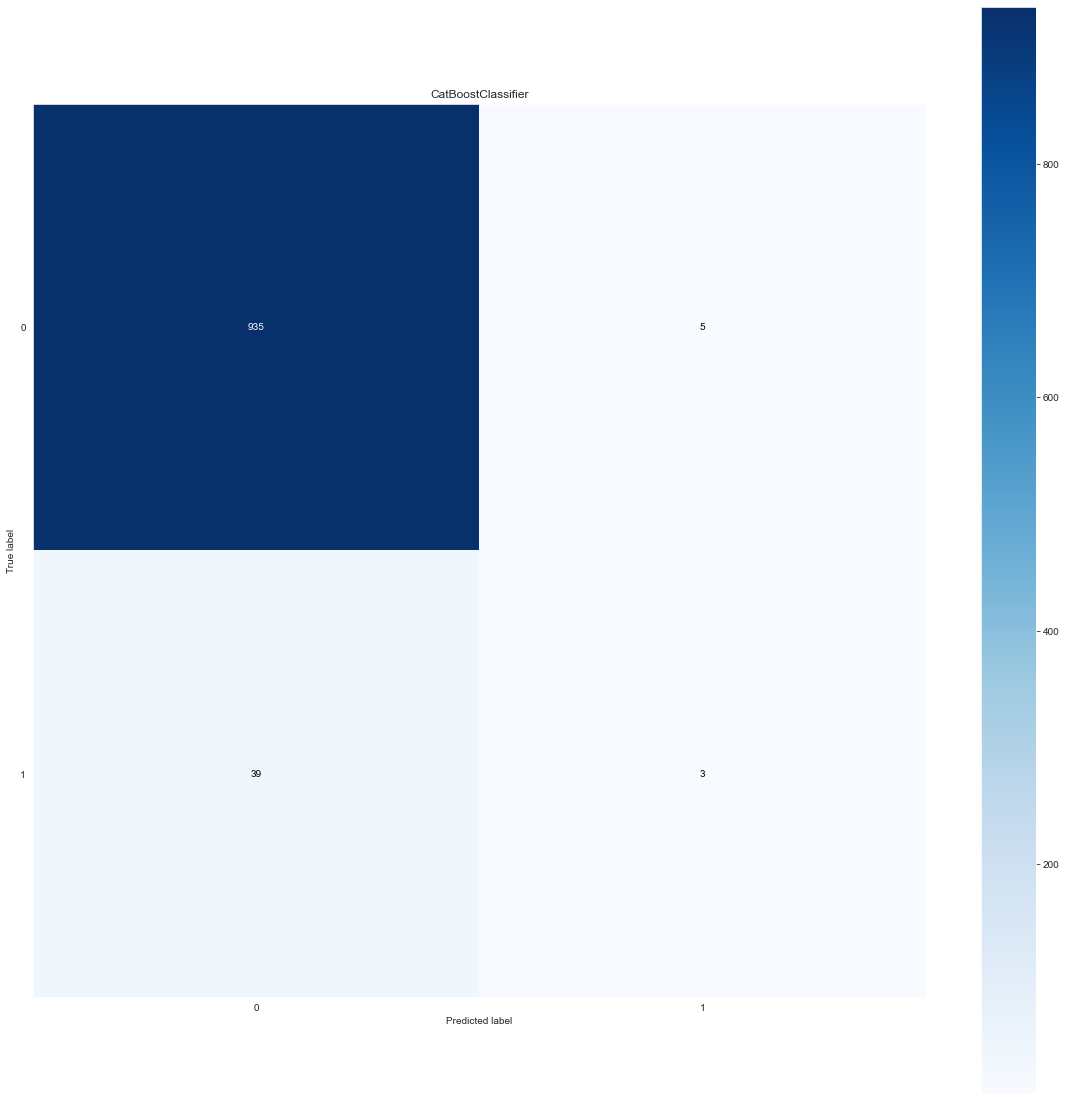

In [40]:
models = [
    # ('Logistic Regression', LogisticRegression(max_iter=1000)),
    # ('Decision Tree', DecisionTreeClassifier()),
    # ('Random Forest Classifier', RandomForestClassifier()),
    ('XGBClassifier', XGBClassifier(max_depth= 80, max_features= 3, n_estimators= 100,learning_rate=0.1),),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)),
    # ('KNeighborsClassifier',KNeighborsClassifier())



]

predicts=[]
for name, model in models:

    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    predicts.append(y_predict)

    print(name)

    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)


In [41]:
# Class count
count_class_g, count_class_h = data['stroke'].value_counts()
print(count_class_g, count_class_h)
# Divide by class
data_class_g = data[data['stroke'] == 0]
data_class_h = data[data['stroke'] == 1]

data_class_g_under = data_class_g.sample(count_class_h)
new_data = pd.concat([data_class_g_under, data_class_h], axis=0)

print('Random under-sampling:')
print(new_data['stroke'].value_counts())

4700 209
Random under-sampling:
0    209
1    209
Name: stroke, dtype: int64


In [42]:
target = "stroke"

features, train = featurewiz(
    new_data,
    target,
    corr_limit=0.8,
    verbose=0,
    sep=",",
    header=0,
    test_data="",
    feature_engg="interactions",
    category_encoders="",
)


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.8
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (418, 11)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or low-information variables found in da

XGBClassifier
0.9994907053730583
0.9541751527494908
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.95      0.93       982

0:	learn: 0.2817446	total: 45.5ms	remaining: 410ms
1:	learn: 0.1702154	total: 92.2ms	remaining: 369ms
2:	learn: 0.1381794	total: 134ms	remaining: 312ms
3:	learn: 0.1272094	total: 176ms	remaining: 264ms
4:	learn: 0.1169775	total: 213ms	remaining: 213ms
5:	learn: 0.1051619	total: 250ms	remaining: 167ms
6:	learn: 0.0973311	total: 286ms	remaining: 123ms
7:	learn: 0.0889141	total: 324ms	remaining: 81ms
8:	learn: 0.0813859	total: 364ms	remaining: 40.4ms
9:	learn: 0.0762076	total: 402ms	remaining: 0us
CatBoostClassifier
0.972498090145149
0.955193482688391
              precision    recall  f1-score   support

           

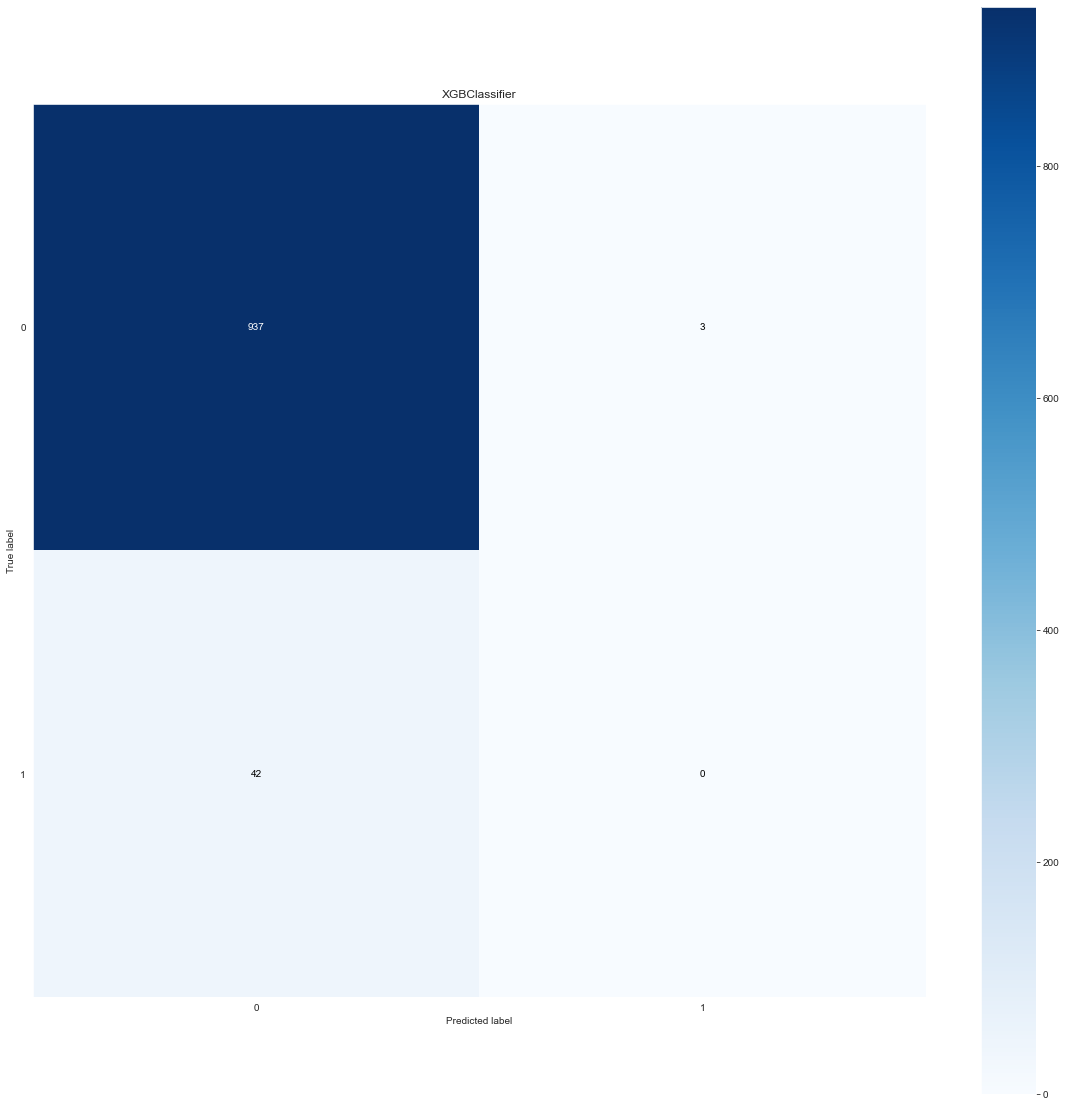

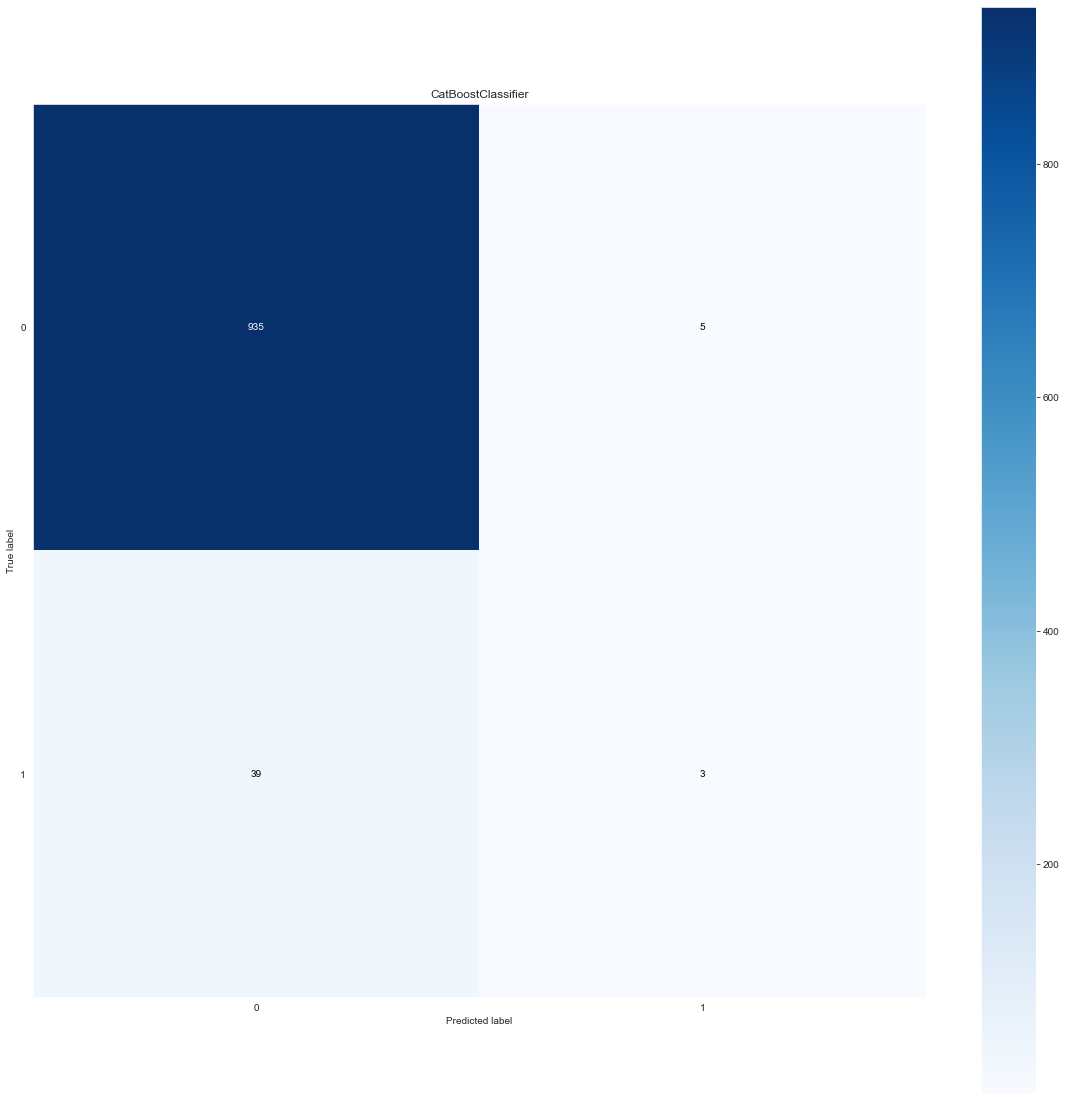

In [43]:
models = [
    # ('Logistic Regression', LogisticRegression(max_iter=1000)),
    # ('Decision Tree', DecisionTreeClassifier()),
    # ('Random Forest Classifier', RandomForestClassifier()),
    ('XGBClassifier', XGBClassifier(max_depth= 80, max_features= 3, n_estimators= 100,learning_rate=0.1),),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)),
    # ('KNeighborsClassifier',KNeighborsClassifier())



]

predicts=[]
for name, model in models:

    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    predicts.append(y_predict)

    print(name)

    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)


In [30]:

x, y = data.iloc[:, 0:-1], data.iloc[:, -1:]

print("Before Oversampling, the counts of label 1: ", y.value_counts()[1])
print("Before Oversampling, the counts of label 0: ", y.value_counts()[0])

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

print("After Oversampling, the counts of label 1: ", y.value_counts()[1])
print("After Oversampling, the counts of label 0: ", y.value_counts()[0])

Before Oversampling, the counts of label 1:  209
Before Oversampling, the counts of label 0:  4700
After Oversampling, the counts of label 1:  4700
After Oversampling, the counts of label 0:  4700


In [31]:
data2=x.join(y)
data2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1,1
1,1,80.000000,0,1,1,2,0,105.920000,32.500000,2,1
2,0,49.000000,0,0,1,2,1,171.230000,34.400000,3,1
3,0,79.000000,1,0,1,3,0,174.120000,24.000000,2,1
4,1,81.000000,0,0,1,2,1,186.210000,29.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9395,0,78.754756,0,0,0,2,1,204.656806,30.632134,2,1
9396,0,80.866290,0,0,1,2,0,73.955819,24.866290,1,1
9397,0,74.729090,0,0,1,2,0,194.260702,25.830762,1,1
9398,1,63.893141,0,1,1,2,0,192.154981,37.393141,2,1


In [32]:
target = "stroke"

features, train = featurewiz(
    data2,
    target,
    corr_limit=0.8,
    verbose=0,
    sep=",",
    header=0,
    test_data="",
    feature_engg="interactions",
    category_encoders="",
)


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.8
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (9400, 11)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or low-information variables found in d

In [97]:
train

,work_type_div_by_ever_married,Residence_type_mult_by_ever_married,work_type_div_by_age,heart_disease_plus_age,gender_div_by_ever_married,Residence_type_div_by_hypertension,Residence_type_plus_gender,hypertension_mult_by_age,Residence_type_plus_ever_married,gender_div_by_age,...,gender_plus_ever_married,heart_disease_div_by_age,ever_married_mult_by_age,smoking_status_squared,avg_glucose_level_mult_by_age,smoking_status_div_by_ever_married,work_type_div_by_bmi,heart_disease_minus_ever_married,ever_married_plus_hypertension,stroke
0,2.0,1,0.029851,68.000000,1.0,NaN,2,0.0,2,0.014925,...,2,0.014925,67.000000,1,15322.230000,1.0,0.054645,0,1,1
1,2.0,0,0.025000,81.000000,1.0,NaN,1,0.0,1,0.012500,...,2,0.012500,80.000000,4,8473.600000,2.0,0.061538,0,1,1
2,2.0,1,0.040816,49.000000,0.0,NaN,1,0.0,2,0.000000,...,1,0.000000,49.000000,9,8390.270000,3.0,0.058140,-1,1,1
3,3.0,0,0.037975,79.000000,0.0,0.0,0,79.0,1,0.000000,...,1,0.000000,79.000000,4,13755.480000,2.0,0.125000,-1,2,1
4,2.0,1,0.024691,81.000000,1.0,NaN,2,0.0,2,0.012346,...,2,0.000000,81.000000,1,15083.010000,1.0,0.068966,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9395,2.0,0,0.046307,43.190142,0.0,NaN,0,0.0,1,0.000000,...,1,0.000000,43.190142,4,2842.310676,2.0,0.067867,-1,1,1
9396,2.0,0,0.037877,52.802770,0.0,NaN,0,0.0,1,0.000000,...,1,0.000000,52.802770,4,5104.670382,2.0,0.075758,-1,1,1
9397,NaN,0,0.037120,80.818421,NaN,NaN,1,0.0,1,0.000000,...,0,0.000000,0.000000,4,7717.999665,NaN,0.137445,0,0,1
9398,2.0,0,0.027090,73.826683,0.0,NaN,0,0.0,1,0.000000,...,1,0.000000,73.826683,4,5185.388318,2.0,0.069898,-1,1,1


In [33]:
x = train.drop(["stroke"], axis=1)
y = train["stroke"].values
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

XGBClassifier
0.9993351063829787
0.949468085106383
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       940
           1       0.93      0.97      0.95       940

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880

0:	learn: 0.6042231	total: 3.4s	remaining: 5m 36s
1:	learn: 0.5434854	total: 4.32s	remaining: 3m 31s
2:	learn: 0.4744123	total: 9.77s	remaining: 5m 15s
3:	learn: 0.4193440	total: 14s	remaining: 5m 36s
4:	learn: 0.3747388	total: 18.6s	remaining: 5m 53s
5:	learn: 0.3427319	total: 24.2s	remaining: 6m 18s
6:	learn: 0.3223998	total: 27.6s	remaining: 6m 7s
7:	learn: 0.2973702	total: 30.2s	remaining: 5m 47s
8:	learn: 0.2749275	total: 32.5s	remaining: 5m 28s
9:	learn: 0.2562817	total: 36.7s	remaining: 5m 30s
10:	learn: 0.2412074	total: 40.7s	remaining: 5m 29s
11:	learn: 0.2280197	total: 44.9s	remaining: 5m 29s
12:	learn: 0

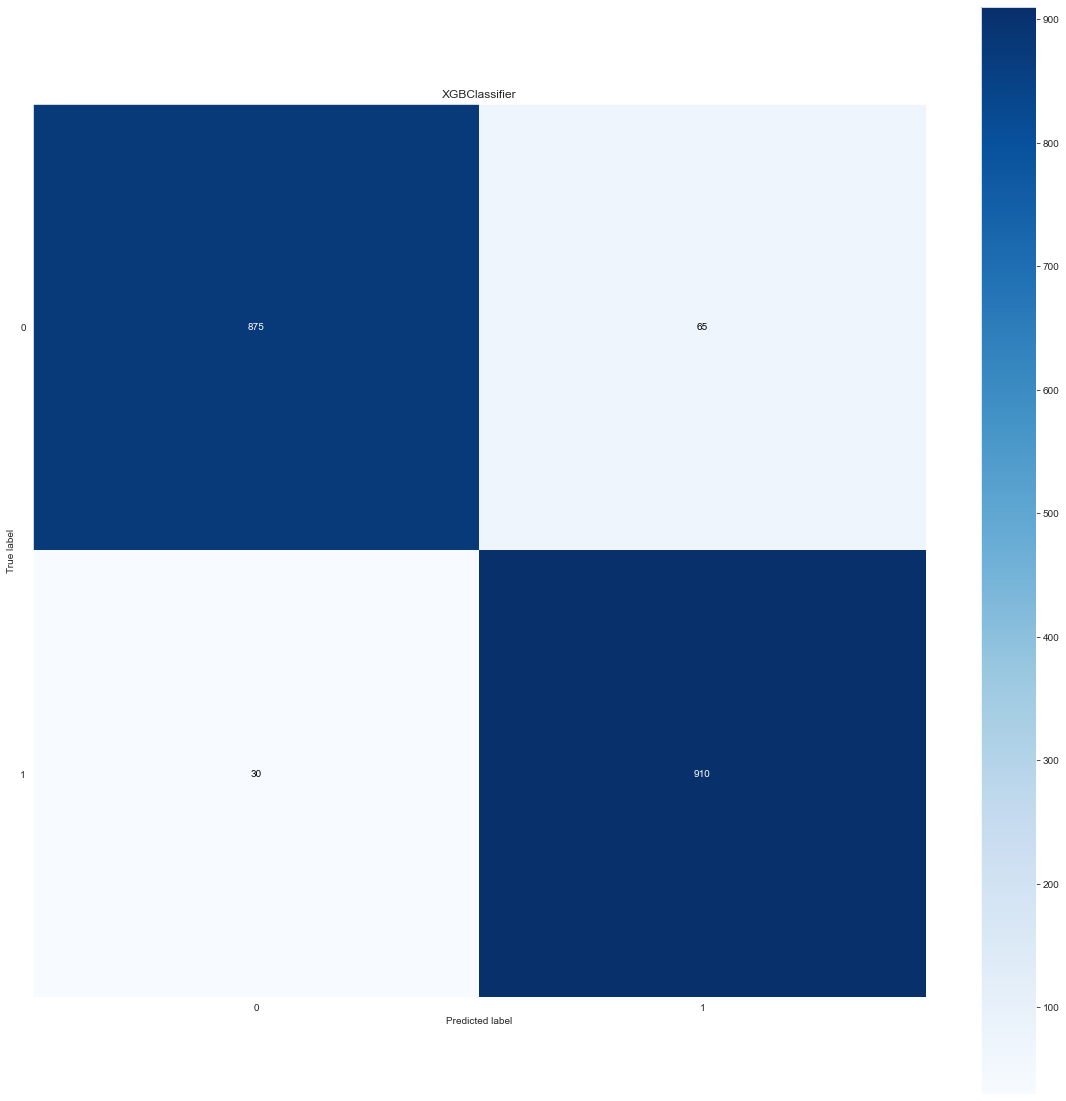

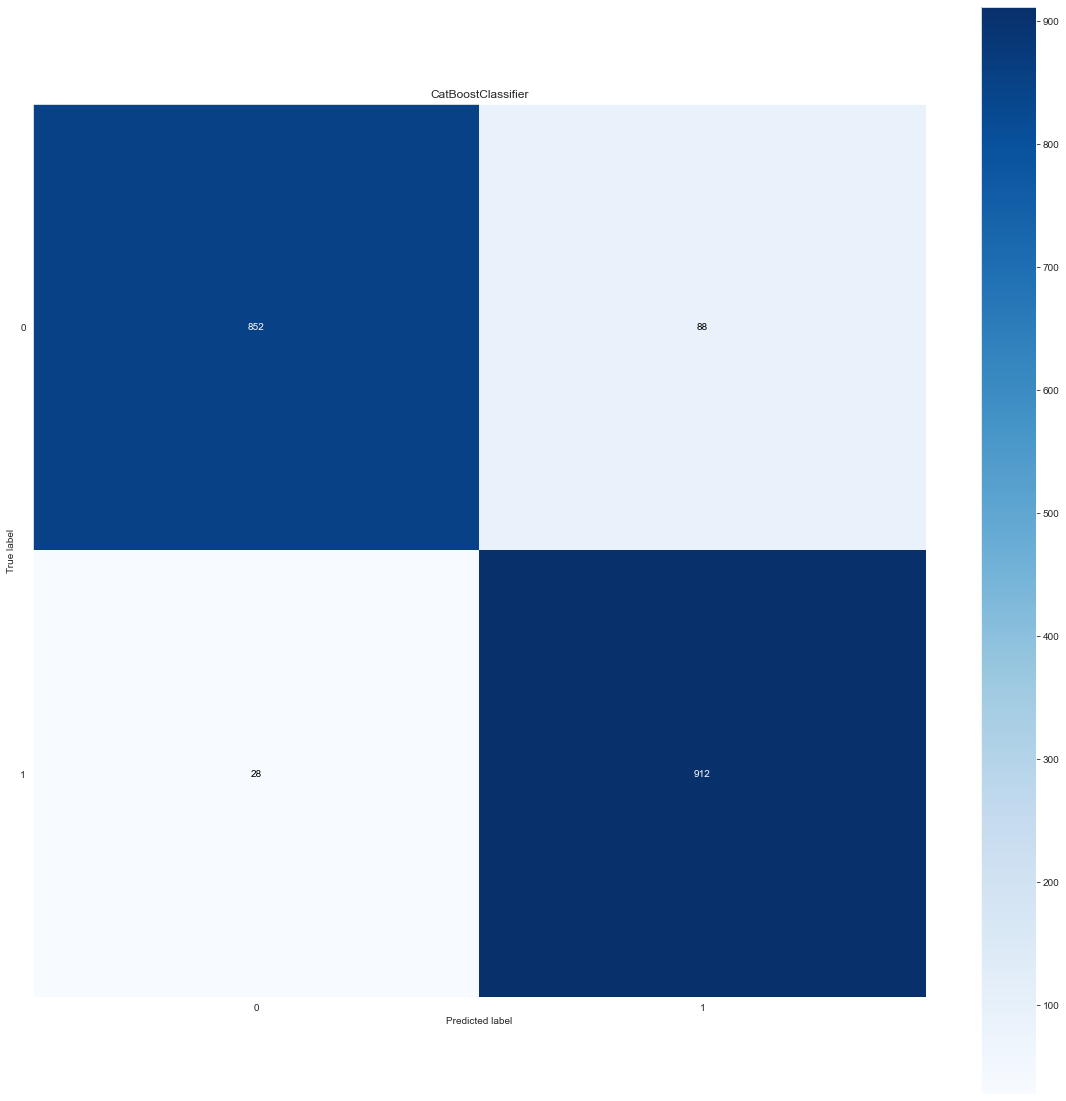

In [99]:
models = [
    # ('Logistic Regression', LogisticRegression(max_iter=1000)),
    #('Decision Tree', DecisionTreeClassifier()),
    #('Random Forest Classifier', RandomForestClassifier(n_estimators=50)),
    ('XGBClassifier', XGBClassifier(max_depth= 80, max_features= 3, n_estimators= 50,learning_rate=0.1),),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 15  ,iterations=100, learning_rate=0.1)),
    # ('KNeighborsClassifier',KNeighborsClassifier())



]

predicts=[]
for name, model in models:

    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    predicts.append(y_predict)

    print(name)

    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)

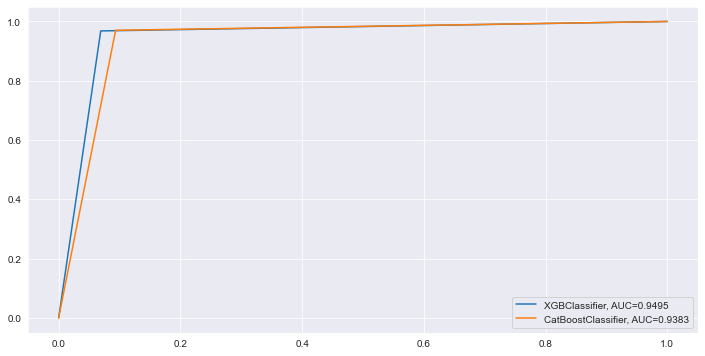

In [100]:
#set up plotting area
plt.rcParams["figure.figsize"] = (12,6)
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y_test, predicts[0])
auc = round(metrics.roc_auc_score(y_test, predicts[0]), 4)
plt.plot(fpr,tpr,label="XGBClassifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, predicts[1])
auc = round(metrics.roc_auc_score(y_test, predicts[1]), 4)
plt.plot(fpr,tpr,label="CatBoostClassifier, AUC="+str(auc))



#add legend
plt.legend()

In [126]:
x = train.drop(["stroke"], axis=1)
y = train["stroke"].values
scaler = RobustScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

XGBClassifier
0.9993351063829787
0.949468085106383
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       940
           1       0.93      0.97      0.95       940

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880

0:	learn: 0.6042231	total: 2.45s	remaining: 4m 2s
1:	learn: 0.5434854	total: 3.02s	remaining: 2m 27s
2:	learn: 0.4744123	total: 5.28s	remaining: 2m 50s
3:	learn: 0.4193440	total: 7.55s	remaining: 3m 1s
4:	learn: 0.3747388	total: 9.89s	remaining: 3m 7s
5:	learn: 0.3427319	total: 12.2s	remaining: 3m 10s
6:	learn: 0.3223998	total: 14.4s	remaining: 3m 11s
7:	learn: 0.2973702	total: 16.7s	remaining: 3m 11s
8:	learn: 0.2749275	total: 19.2s	remaining: 3m 14s
9:	learn: 0.2562817	total: 22.3s	remaining: 3m 20s
10:	learn: 0.2412074	total: 25s	remaining: 3m 21s
11:	learn: 0.2280197	total: 27.4s	remaining: 3m 21s
12:	learn: 0.

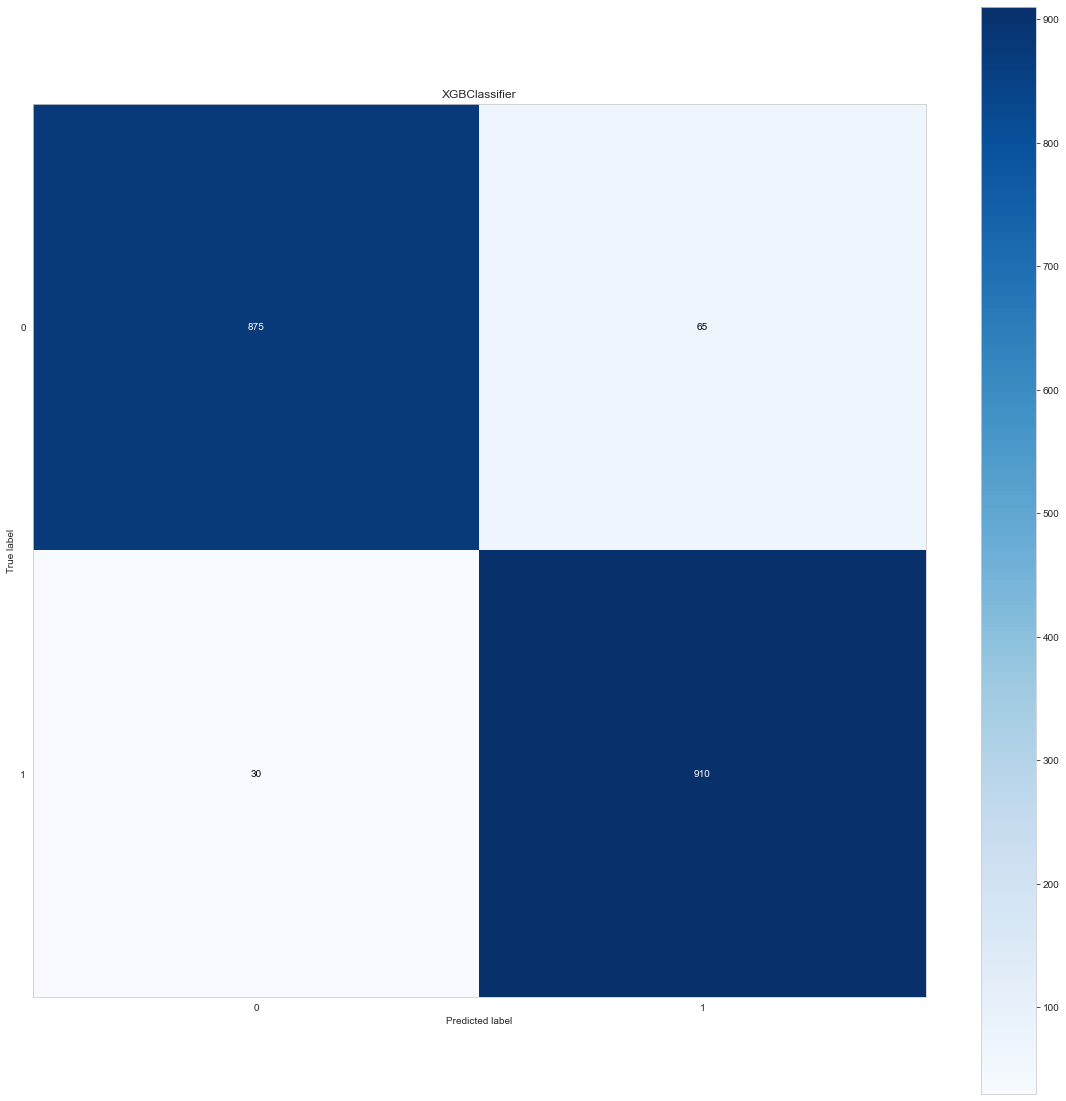

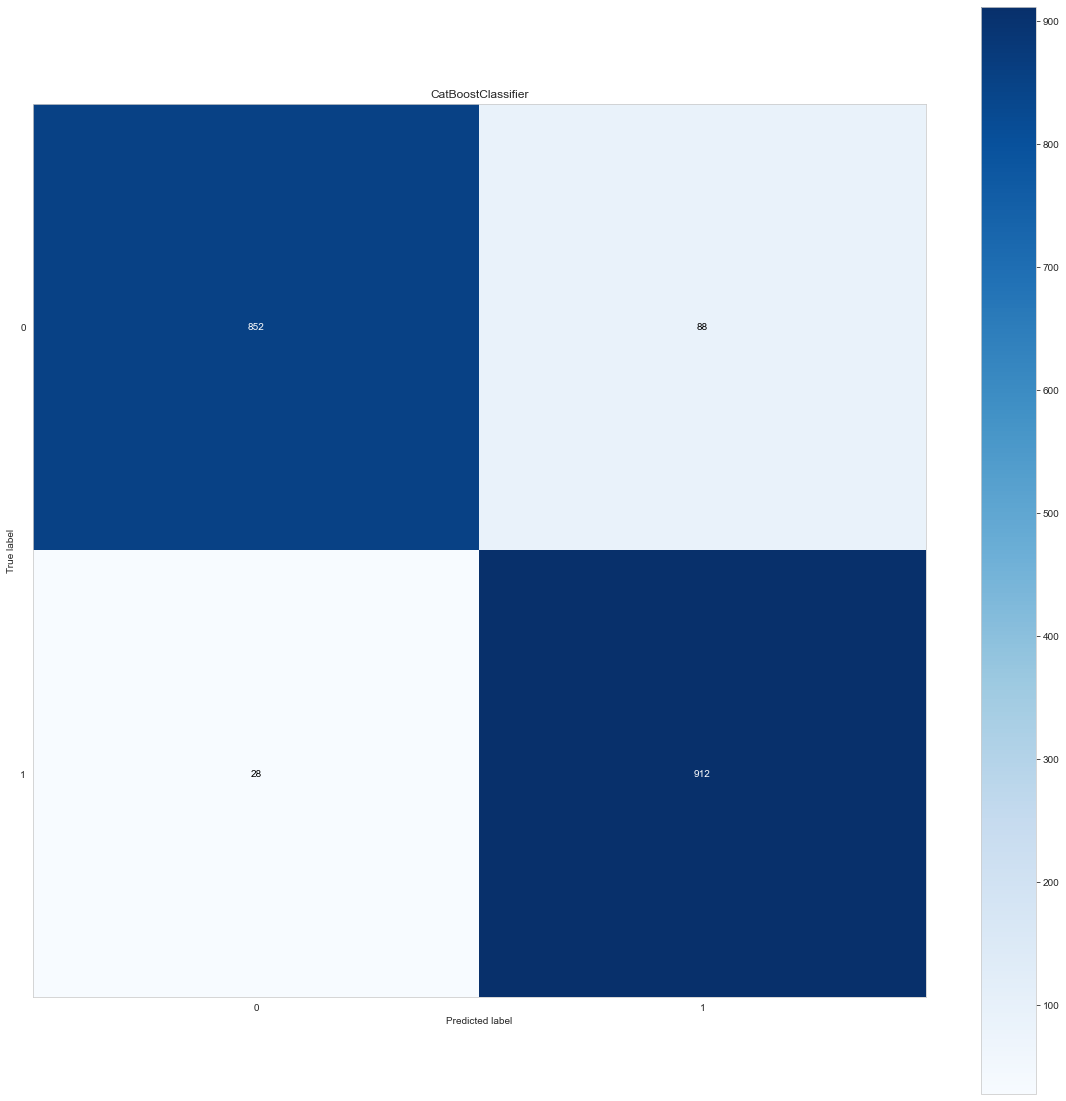

In [127]:
models = [
    # ('Logistic Regression', LogisticRegression(max_iter=1000)),
    #('Decision Tree', DecisionTreeClassifier()),
    #('Random Forest Classifier', RandomForestClassifier(n_estimators=50)),
    ('XGBClassifier', XGBClassifier(max_depth= 80, max_features= 3, n_estimators= 50,learning_rate=0.1),),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 15  ,iterations=100, learning_rate=0.1)),
    # ('KNeighborsClassifier',KNeighborsClassifier())



]

predicts=[]
for name, model in models:

    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    predicts.append(y_predict)

    print(name)

    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)

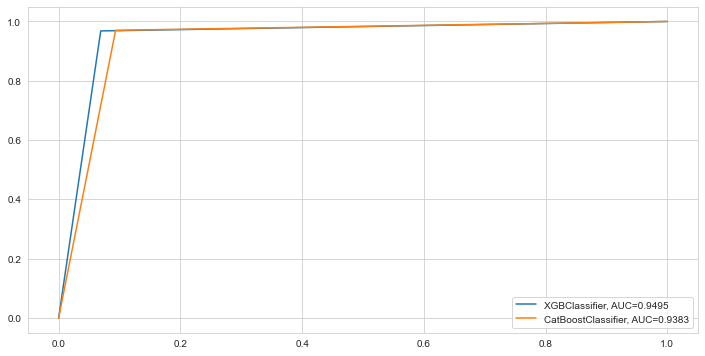

In [128]:
#set up plotting area
plt.rcParams["figure.figsize"] = (12,6)
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y_test, predicts[0])
auc = round(metrics.roc_auc_score(y_test, predicts[0]), 4)
plt.plot(fpr,tpr,label="XGBClassifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, predicts[1])
auc = round(metrics.roc_auc_score(y_test, predicts[1]), 4)
plt.plot(fpr,tpr,label="CatBoostClassifier, AUC="+str(auc))



#add legend
plt.legend()

In [80]:
x = data2.drop(["stroke"], axis=1)
y = data2["stroke"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
x = scaler.fit_transform(x)
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('XGBClassifier', XGBClassifier(max_depth= 80, max_features= 3, n_estimators= 100,learning_rate=0.1),),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)),
    ('KNeighborsClassifier',KNeighborsClassifier())



]

predicts=[]
for name, model in models:

    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    predicts.append(y_predict)

    print(name)

    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))
    print(classification_report(y_test, y_predict))


Logistic Regression
0.8041134751773049
0.8029787234042554
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1164
           1       0.79      0.82      0.81      1186

    accuracy                           0.80      2350
   macro avg       0.80      0.80      0.80      2350
weighted avg       0.80      0.80      0.80      2350

Decision Tree
1.0
0.8387234042553191
              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1164
           1       0.88      0.79      0.83      1186

    accuracy                           0.84      2350
   macro avg       0.84      0.84      0.84      2350
weighted avg       0.84      0.84      0.84      2350

Random Forest Classifier
1.0
0.9251063829787234
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1164
           1       0.93      0.92      0.93      1186

    accuracy                           

In [107]:
model=svm.SVC()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("SVM")
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(classification_report(y_test, y_predict))

KNeighborsClassifier
0.8695035460992908
0.8761702127659574
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1164
           1       0.86      0.91      0.88      1186

    accuracy                           0.88      2350
   macro avg       0.88      0.88      0.88      2350
weighted avg       0.88      0.88      0.88      2350



In [54]:
model=XGBClassifier(max_depth= 30, max_features= 3, n_estimators= 500,learning_rate=0.01)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("XGB")
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(classification_report(y_test, y_predict))

XGB
0.9996010638297872
0.9473404255319149
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       940
           1       0.93      0.96      0.95       940

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



In [51]:
x = train.drop(["stroke"], axis=1)
y = train["stroke"].values
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

In [52]:
param_grid = {
    "max_depth": [80, 90, 100, 110],
    "max_features": [3, 5, 7],
    "n_estimators": [100, 200, 300, 1000],
}

# Create a based model

#rf = RandomForestClassifier()
xgb = XGBClassifier()
#cat = CatBoostClassifier()
# Instantiate the grid search model

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'max_depth': 80, 'max_features': 3, 'n_estimators': 1000}
0.9476065049253418


In [56]:
model=XGBClassifier(max_depth= 80, max_features= 3, n_estimators= 1000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("XGB")
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(classification_report(y_test, y_predict))

XGB
1.0
0.9563829787234043
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       940
           1       0.95      0.97      0.96       940

    accuracy                           0.96      1880
   macro avg       0.96      0.96      0.96      1880
weighted avg       0.96      0.96      0.96      1880



In [123]:
param_grid = {
    "max_depth": [80, 90, 100, 110],
    "max_features": [3, 5, 7],
    "n_estimators": [100, 200, 300, 1000],
}

# Create a based model

rf = RandomForestClassifier()
#xgb = XGBClassifier()
#cat = CatBoostClassifier()
# Instantiate the grid search model

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'max_depth': 100, 'max_features': 5, 'n_estimators': 200}
0.9341843971631206


In [61]:
x = data2.drop(["stroke"], axis=1)
y = data2["stroke"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
model = RandomForestClassifier(n_estimators=200, max_features=5, max_depth=100)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Random Forest")
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(classification_report(y_test, y_predict))

Random Forest
1.0
0.9400709219858157
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1407
           1       0.93      0.96      0.94      1413

    accuracy                           0.94      2820
   macro avg       0.94      0.94      0.94      2820
weighted avg       0.94      0.94      0.94      2820



In [134]:
model=LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("LogisticRegression")
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(classification_report(y_test, y_predict))

KNeighborsClassifier
0.8041134751773049
0.8029787234042554
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1164
           1       0.79      0.82      0.81      1186

    accuracy                           0.80      2350
   macro avg       0.80      0.80      0.80      2350
weighted avg       0.80      0.80      0.80      2350



In [150]:
model= DecisionTreeClassifier(max_depth=15,max_features=8,random_state=15)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("DecisionTree")
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(classification_report(y_test, y_predict))

KNeighborsClassifier
0.9782978723404255
0.8417021276595744
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1164
           1       0.86      0.82      0.84      1186

    accuracy                           0.84      2350
   macro avg       0.84      0.84      0.84      2350
weighted avg       0.84      0.84      0.84      2350



In [76]:
model = RandomForestClassifier(n_estimators=60, max_features=4, max_depth=20)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Random Forest")
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
print(classification_report(y_test, y_predict))

Random Forest
0.9998480243161094
0.9453900709219858
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1407
           1       0.93      0.96      0.95      1413

    accuracy                           0.95      2820
   macro avg       0.95      0.95      0.95      2820
weighted avg       0.95      0.95      0.95      2820



XGB
0.9993351063829787
0.9531914893617022
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       940
           1       0.94      0.97      0.95       940

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880



<AxesSubplot:title={'center':'XGB'}, xlabel='Predicted label', ylabel='True label'>

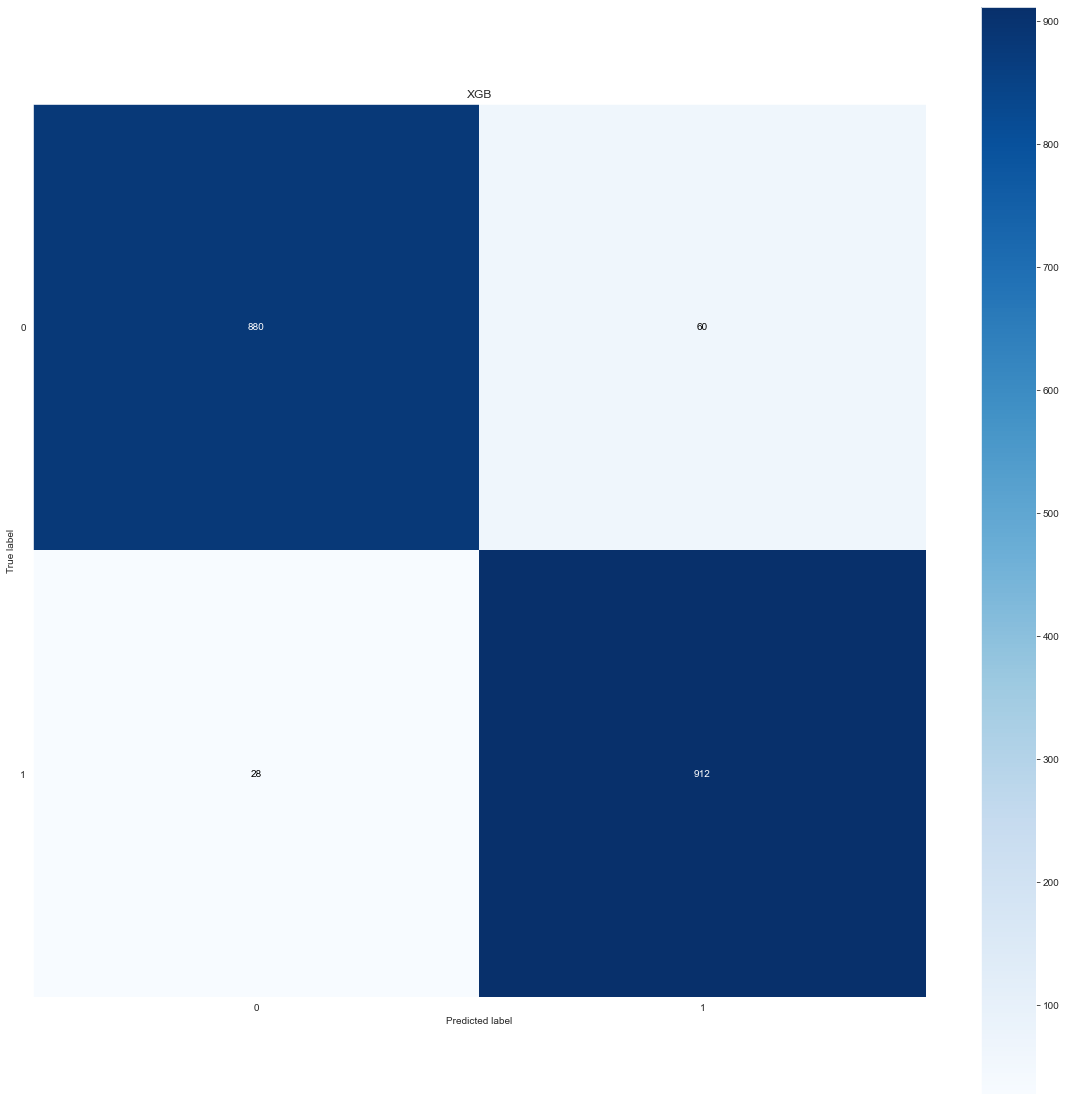

In [35]:
finalmodel=XGBClassifier(max_depth= 80, max_features= 3, n_estimators= 50,learning_rate=0.1)
finalmodel.fit(x_train, y_train)
y_predict = finalmodel.predict(x_test)
print("XGB")
print(finalmodel.score(x_train, y_train))
print(finalmodel.score(x_test, y_test))
print(classification_report(y_test, y_predict))